<a href="https://colab.research.google.com/github/lsantiago/PythonIntermedio/blob/master/Talleres/PrimerBimestre/TallerNro2-PANDA-MATPLOTLIB/TallerNro2PB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TALLER NRO. 2, PANDAS + MATPLOTLIB

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import datetime

custom_date_parser = lambda x: datetime.strptime(x, "%Y%m%d")

# Importar ambas tablas de datos en python usando pandas. Poner la columna del índice en "MESS_DATUM" y analizar los valores de la columna como fechas.
# Importar ambas tablas de datos en python usando pandas. Poner la columna del índice en "MESS_DATUM" y analizar los valores de la columna como fechas.
garmisch  = pd.read_csv(
    'data/garmisch.txt', 
    sep=';', 
    index_col=['MESS_DATUM'], 
    parse_dates=['MESS_DATUM'], 
    date_parser=custom_date_parser)
zugspitze = pd.read_csv(
    'data/zugspitze.txt', 
    sep=';', 
    index_col=['MESS_DATUM'], 
    parse_dates=['MESS_DATUM'], 
    date_parser=custom_date_parser)

garmisch


garmisch.head()


,STATIONS_ID,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
MESS_DATUM,,,,,,,,,,,,,,,,,,
2017-10-10,1550,10,5.6,1.0,3,0.0,6,2.300,0,7.5,9.4,937.40,9.3,82.50,15.7,4.6,3.0,eor
2017-10-11,1550,10,-999.0,-999.0,3,0.0,0,9.533,0,2.6,9.1,938.41,9.2,81.04,18.5,2.9,1.4,eor
2017-10-12,1550,10,-999.0,-999.0,3,0.0,0,9.483,0,1.9,9.0,941.30,10.6,75.92,22.2,3.1,1.1,eor
2017-10-13,1550,10,-999.0,-999.0,3,0.0,0,9.483,0,3.8,10.3,944.63,10.7,82.04,19.5,4.8,2.9,eor
2017-10-14,1550,10,-999.0,-999.0,3,0.0,0,9.617,0,0.3,9.9,944.99,11.2,78.67,21.4,3.9,1.9,eor


In [21]:
# Recorta las tablas a el año 2018 [1P]
garmisch  = garmisch.loc['2018']
zugspitze = zugspitze.loc['2018']
garmisch


,STATIONS_ID,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
MESS_DATUM,,,,,,,,,,,,,,,,,,
2018-01-01,1550,10,4.0,1.1,3,2.1,8,0.067,19,5.5,5.6,925.96,-0.6,95.25,4.4,-3.8,-10.0,eor
2018-01-02,1550,10,10.1,1.6,3,4.6,8,0.717,20,7.0,5.6,930.25,0.8,86.83,4.6,-1.8,-7.9,eor
2018-01-03,1550,10,20.1,2.0,3,13.3,8,0.000,21,7.4,6.4,922.28,2.2,88.83,5.9,0.0,-1.2,eor
2018-01-04,1550,10,5.2,0.9,3,49.8,8,0.000,19,7.3,6.8,921.36,1.8,97.79,5.4,0.6,0.0,eor
2018-01-05,1550,10,4.4,1.1,3,0.0,0,3.250,17,5.8,7.3,921.57,3.1,95.58,8.5,-1.1,-5.7,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,1550,10,2.7,1.0,3,0.0,0,3.167,0,6.6,4.9,942.36,-1.8,91.21,5.5,-5.3,-7.9,eor
2018-12-28,1550,10,5.9,1.0,3,0.0,0,2.817,0,5.8,5.4,942.55,-0.7,92.08,5.7,-3.9,-7.0,eor
2018-12-29,1550,10,7.0,1.0,3,4.7,8,1.083,0,5.9,4.6,945.82,-2.8,92.50,0.3,-5.1,-8.1,eor


In [22]:

# Volver a muestrear los datos de temperatura a promedios mensuales (" TMK") y los datos de precipitaciones a sumas mensuales (" RSK"): [1P]
garmisch_agg  = garmisch.loc[:, [' TMK', ' RSK']].resample('1m').agg({' TMK': 'mean', ' RSK': 'sum'})
garmisch_agg.head()

,TMK,RSK
MESS_DATUM,,
2018-01-31,0.806452,220.4
2018-02-28,-3.353571,55.2
2018-03-31,2.132258,50.4
2018-04-30,12.393333,34.0
2018-05-31,14.138710,114.8


In [23]:

zugspitze_agg  = zugspitze.loc[:, [' TMK', ' RSK']].resample('1m').agg({' TMK': 'mean', ' RSK': 'sum'})
zugspitze_agg.head()


,TMK,RSK
MESS_DATUM,,
2018-01-31,-8.732258,295.6
2018-02-28,-14.764286,86.0
2018-03-31,-9.822581,148.4
2018-04-30,-1.906667,34.1
2018-05-31,0.358065,149.8


In [24]:

# Define una función de trazado que dibuja un simple diagrama climático
# Agrega los argumentos como se menciona en la lista de documentos abajo [1P]
# Establece el rango de temperatura por defecto de -15°C a 20°C y el rango de precipitaciones de 0mm a 370mm [1P]

def crear_diagrama_climatico(
        df,
        temp_col,
        prec_col,
        title,
        filename,
        temp_min=-15,
        temp_max=20,
        prec_min=0,
        prec_max=370
    ):
    """
    Dibuja un diagrama climático.
    
    Parametros
    ----------
    df : pd.DataFrame
        Dataframe de datos con valores para graficar
    temp_col : str
        Nombre de la columna de temperatura
    prec_col : str
        Nombre de la columna de precipitación
    title : String
        El título para la figura
    filename : String
        El nombre de la figura de salida
    temp_min : Number
        El valor mínimo de temperatura a mostrar
    temp_max : Number
        El valor máximo de temperatura a mostrar
    prec_min : Number
        El valor mínimo de precipitación a mostrar
    prec_max : Number
        El valor máximo de precipitación a mostrar

    Returns
    -------
    La figura
    
    """

    fig = plt.figure(figsize=(10,8))
    plt.rcParams['font.size'] = 16

    ax2 = fig.add_subplot(111)
    ax1 = ax2.twinx()

    
    
    # Dibuja los valores de temperatura como una línea roja y los valores de precipitación como barras azules: [1P]
    # Pista: Revisa la documentación de matplotlib cómo trazar gráficos de barras (plt.bar?). Intenta establecer directamente la correcta
    # etiquetas del eje X (nombres cortos de los meses)
    ax2.bar(df.index.strftime("%b"), df.loc[:,prec_col].values, color="blue")
    ax1.plot(df.index.strftime("%b"), df.loc[:,temp_col].values, c="red")
    
    # Establezca los límites apropiados para cada eje Y usando los argumentos de la función: [1P]
    ax2.set_ylim([prec_min, prec_max])
    ax1.set_ylim([temp_min, temp_max])
    
    # Ponga las etiquetas apropiadas a cada eje Y: [1P]
    ax2.set_ylabel("Precipitación")
    ax1.set_ylabel("Temperatura")

    # Dale a tu diagrama el título de los argumentos proporcionados: [1P]
    plt.title(title)

    # Guarda la figura como imagen png en la carpeta "output" con el nombre de archivo dado. [1P]
    #...

    final_filneame = ("output/%s.png" %(filename)) 
    plt.savefig(final_filneame)
    return fig

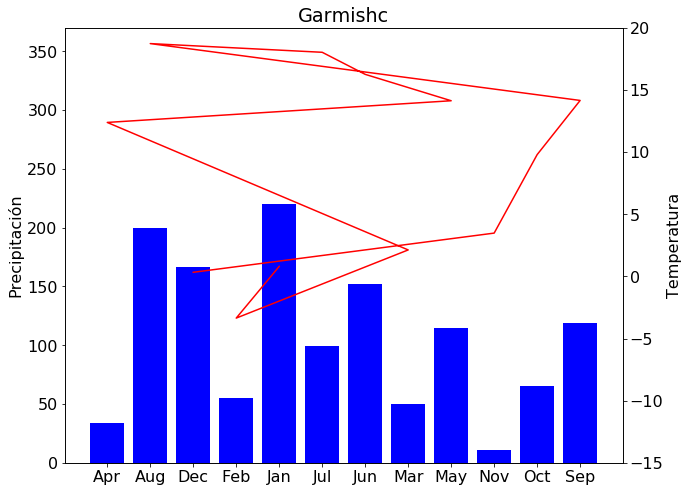

In [25]:
# Utilice esta función para dibujar un diagrama climático para 2018 para ambas estaciones y guarde el resultado: [1P]
crear_diagrama_climatico(df=garmisch_agg,
        temp_col=' TMK',
        prec_col=' RSK',
        title='Garmishc',
        filename='garmisch_figure',
        temp_min=-15,
        temp_max=20,
        prec_min=0,
        prec_max=370);


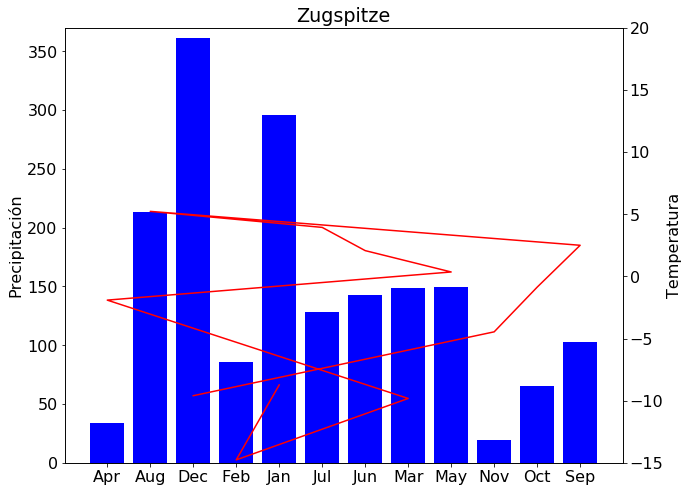

In [26]:
crear_diagrama_climatico(df=zugspitze_agg,
        temp_col=' TMK',
        prec_col=' RSK',
        title='Zugspitze',
        filename='zugspitze_figure',
        temp_min=-15,
        temp_max=20,
        prec_min=0,
        prec_max=370);